In [15]:
import numpy as np
import gym
import math
import torch as T
import random
from sac_trader import SAC_Trader
from sac_trader2 import SAC_Trader2
from sac_agent import SAC_Agent
import time

In [16]:
s0 = 100 # initial mid-price

T = 1 # terminal time

sigma = 2 # volatility

gamma = 0.1 # risk aversion parameter

k = 1.5 # k = alpha*K and this is determined by the market order size

A = 140 # scaling factor that depends on frequency  of market buy or sell orders and market order size

N_prices = 20

dt = 1/ N_prices # time step

In [17]:
agent = SAC_Agent([2])

trader = SAC_Trader2(sigma, A, k, dt, agent)

train_start = time.time()
epochs_start = time.time()

epoch_num = 1

train_rewards = np.empty(shape=epoch_num)
for epoch in range(epoch_num):

    bid = np.empty(shape=1)  # ask quoted by strategy
    ask = np.empty(shape=1)  # bid quoted by str.
    
    s = np.zeros(N_prices)
    s[0] = s0
    W = np.random.normal(0, np.sqrt(dt), N_prices)
    for i in range(1, N_prices):
        ds = sigma * W[i-1]
        s[i] = s[i-1] + ds

    # simulation loop, training logic is inside get_quotes
    for i in range(N_prices):
        Bid, Ask = trader.get_bid_ask(1 - i*dt, s[i], trainMode=True)
        # print("s: ", s[i], "Bid: ", Bid, "Ask: ", Ask)
        trader.interact_with_market(Bid, Ask, s[i])

        print()


    # save cumulative reward for epoch
    train_rewards[epoch] = trader.reward_total

    print(train_rewards[epoch])

    # finish training epoch
    trader.reset()


explore:  True
counter:  0 memory_size:  1000
s:  100.0 inventory:  0 sigma:  2 action:  [0.79042392] risk:  [0.89521196] timeleft:  1.0 res_price:  [100.]
spread [4.62642507]
Bid, Ask:  (array([97.68678746]), array([102.31321254]))
0

here
explore:  True
counter:  1 memory_size:  1000
s:  99.82002678189188 inventory:  1 sigma:  2 action:  [0.09594194] risk:  [0.54797097] timeleft:  0.995 res_price:  [97.63910232]
spread [3.31742417]
Bid, Ask:  (array([95.98039023]), array([99.2978144]))
[2.06252864]

here
explore:  True
counter:  2 memory_size:  1000
s:  99.68812200735552 inventory:  0 sigma:  2 action:  [0.97821757] risk:  [0.98910878] timeleft:  0.99 res_price:  [99.68812201]
spread [4.94094342]
Bid, Ask:  (array([97.2176503]), array([102.15859372]))
[1.54031626]

here
explore:  True
counter:  3 memory_size:  1000
s:  99.83389482212748 inventory:  0 sigma:  2 action:  [0.28834112] risk:  [0.64417056] timeleft:  0.985 res_price:  [99.83389482]
spread [3.6473273]
Bid, Ask:  (array([98

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
dt

0.005

AttributeError: type object 'SAC_Trader' has no attribute 'Ask'

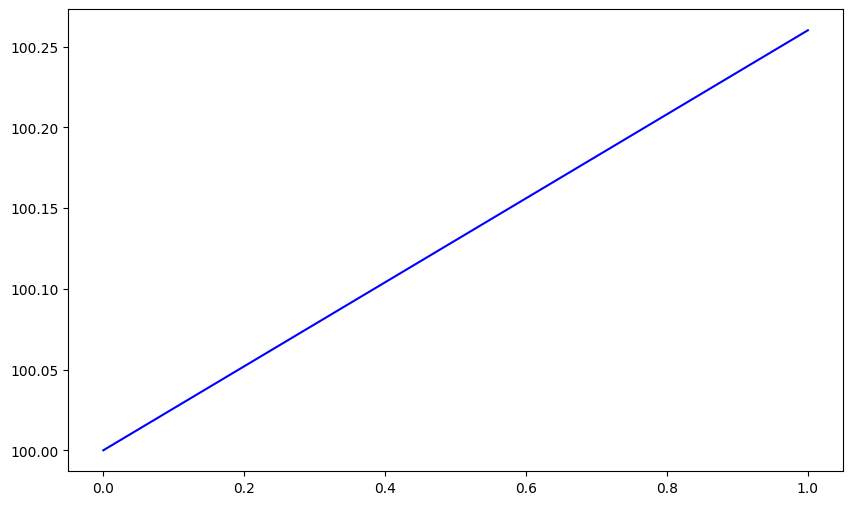

In [ ]:
import matplotlib.pyplot as plt
# Plot the data
plt.figure(figsize=(10, 6))

# Plot s in blue
plt.plot(s, label='s', color='blue')

# Plot SAC_Trader.Ask in green
plt.plot(SAC_Trader.Ask, label='SAC_Trader.Ask', color='green')

# Plot SAC_Trader.Bid in red
plt.plot(SAC_Trader.Bid, label='SAC_Trader.Bid', color='red')

# Set labels and title
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Plot of s, SAC_Trader.Ask, and SAC_Trader.Bid')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
cumulative_reward = np.cumsum(SAC_Trader.reward)


# Plot the data
plt.figure(figsize=(10, 6))

# Plot cumulative reward in purple (choose your color)
# plt.plot(SAC_Trader.inventory, label='Cumulative Reward', color='purple')
plt.plot(SAC_Trader.reward, label='Reward', color='blue')

# Set labels and title
plt.xlabel('Time Steps')
plt.ylabel('Reward Values')
plt.title('Plot of Rewards')
plt.legend()

# Show the plot
plt.show()
